In [23]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [24]:
# Question 2
p_req_db = -110
p_req = 10**((p_req_db - 30)/10)
freq = 2 * 10**9
c = 3 * 10**8
wavelength = c/freq
R = 5000

Gt = 10**15
Gr = 10**2

Pt = p_req/(Gt * Gr * (wavelength/(4 * np.pi * 5000))**2)

Gwire = (10**0.8)
Pout = Gwire * Pt
Pout
%whos

Variable         Type             Data/Info
-------------------------------------------
Axes3D           type             <class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>
Gr               int              100
Gt               int              1000000000000000
Gwire            float            6.309573444801933
Pout             float            1.1070754460411327e-19
Pt               float            1.7545963379714417e-20
R                int              5000
a                float64          6.28
ax               Axes3DSubplot    Axes(0.125,0.1;0.775x0.8)
azi              ndarray          629: 629 elems, type `float64`, 5032 bytes
c                int              300000000
cm               module           <module 'matplotlib.cm' f<...>ckages/matplotlib/cm.py'>
d_azi            float            0.01
d_the            float            0.01
fig              Figure           Figure(640x480)
freq             int              2000000000
integ_sphere     float64          17.309697353
integ_t  

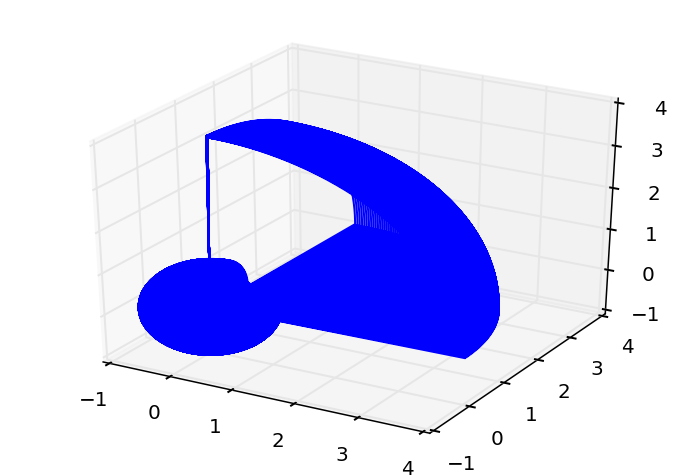

max_gain: 2.90389146803


In [31]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# power
def spherical_plot(azi, the):
    if (0 < azi and azi < np.pi/2 and 0 < the and the < np.pi/2):
        return 2.0**2
    else:
        return 1.0**2
    
d_azi = 0.01
d_the = 0.01
azi = np.arange(0, 2*np.pi, d_azi)
the = np.arange(0, np.pi, d_the)

integ_sphere = 0
test_sphere = 0

# for plotting
x_arr = []
y_arr = []
z_arr = []

for a in azi:
    integ_t = 0
    test_integ_t = 0
    for t in the:
        integ_t = integ_t + spherical_plot(a, t) * np.sin(t) * d_the
        test_integ_t = test_integ_t + 1 * np.sin(t) * d_the
        
        x_arr.append(spherical_plot(a, t) * np.cos(a) * np.sin(t))
        y_arr.append(spherical_plot(a, t) * np.sin(a) * np.sin(t))
        z_arr.append(spherical_plot(a, t) * np.cos(t))
        
    integ_sphere = integ_sphere + integ_t * d_azi
    test_sphere = test_sphere + test_integ_t * d_azi

ax.plot(x_arr, y_arr, z_arr)
plt.show()

max_gain = 0
for a in azi:
    for t in the:
        gain = spherical_plot(a, t)/((1/(4*np.pi)) * integ_sphere)
        if gain > max_gain:
            max_gain = gain

outstr = "max_gain: " + str(max_gain)
print(outstr)